#### 다중 분류를 위한 OvR(OvA)
- 분류 클래스 수 만큼 2진 분류기를 생성하여 다중 분류를 진행


In [15]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import pandas as pd
pd.options.display.float_format= '{:.5f}'.format

- 데이터셋: load_digits
    - 내장 데이터셋
    - 이미지 데이터셋-> 8*8 크기 이미지
    - 이미지 라벨/타겟-> 숫자 0~9 (10개 클래스)
    - 흑백 이미지

In [9]:
# 데이터 로딩
featureDF, targetSR= load_digits(as_frame=True, return_X_y=True)

featureDF=featureDF/255

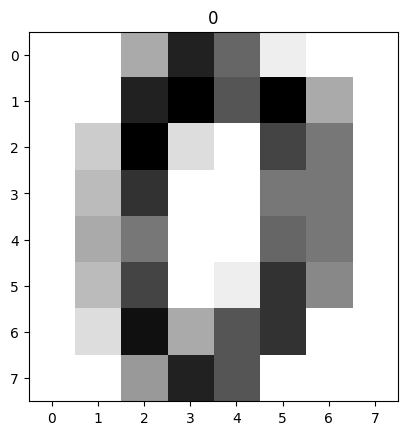

In [6]:
# 이미지 데이터 시각화
import matplotlib.pyplot as plt

# 1d-> 2d로 형태로 변환
imgData= featureDF.iloc[0].to_numpy().reshape(-1, 8)

# 시각화
plt.imshow(imgData, cmap= 'binary')
plt.title(targetSR[0])
plt.show()

- 학습용 데이터셋 준비

In [8]:
X_train, X_test, Y_train, Y_test= train_test_split(featureDF, targetSR, stratify=targetSR, random_state=10)

In [10]:
# 모듈 로딩
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ovr_clf= OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovr_clf.fit(X_train, Y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [11]:
# 모델 파라미터
len(ovr_clf.estimators_), ovr_clf.classes_, ovr_clf.n_classes_, ovr_clf.label_binarizer_

(10,
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 10,
 LabelBinarizer(sparse_output=True))

In [19]:
for idx in range(ovr_clf.n_classes_):
    print(f'{idx}분류기', ovr_clf.estimators_[idx].coef_, ovr_clf.estimators_[idx].intercept_, ovr_clf.predict_proba(X_test.iloc[:1]).argmax())

0분류기 [[ 0.       -0.033946  0.014408  0.092165 -0.006277 -0.222099 -0.093206
  -0.001569 -0.       -0.144863  0.046299  0.213335  0.156151  0.360977
  -0.005929 -0.002593 -0.        0.060953  0.119662 -0.00103  -0.26573
   0.262702  0.043749 -0.003472 -0.        0.191514  0.042121 -0.117639
  -0.512239  0.015493  0.045302 -0.        0.        0.181614  0.183802
  -0.267606 -0.434738 -0.006182  0.032878  0.       -0.000424 -0.039147
   0.338275 -0.109578 -0.313111  0.049864  0.063712 -0.000012 -0.00001
  -0.09187   0.081923 -0.061373  0.060609  0.108396 -0.089169 -0.009418
  -0.       -0.041526 -0.188578  0.195525 -0.044307 -0.052047 -0.100777
  -0.028288]] [-16.666987] 3
1분류기 [[ 0.        0.310494  0.43686   0.409931 -1.168552  0.990732 -1.120979
  -0.001399  0.       -1.432996 -0.572021 -0.304265  0.354575  0.21714
  -0.437867 -0.04159   0.        0.551254  0.302843  0.891108  0.81568
  -0.40179   0.815217 -0.123036 -0.343778 -0.039338 -0.057648  0.377584
  -0.08298   0.428851 -0.4543

In [14]:
import numpy as np
np.set_printoptions(precision=6, suppress=True)

In [17]:
for idx in range(ovr_clf.n_classes_):
    

TypeError: predict_proba() takes 2 positional arguments but 3 were given